# 1. 위도, 경도로 거리 구하는 프로그램

In [1]:
import numbers
import math

class GeoUtil:
    """
    Geographical Utils
    실제 km를 알고 싶다면 haversine 를 이용하고
    그렇지 않고 더 빠른 속도로 단순 비교를 위한 용도라면 euclidean 를 이용할 수 있다.
    
    인용: https://blog.naver.com/wideeyed/221406744173
    """
    @staticmethod
    def degree2radius(degree):
        return degree * (math.pi/180)
    
    @staticmethod
    def get_harversion_distance(x1, y1, x2, y2, round_decimal_digits=5):
        # 오타 수정 요망... harversion -> harversian? or haversine?
        """
        경위도 (x1,y1)과 (x2,y2) 점의 거리를 반환
        Harversion Formula 이용하여 2개의 경위도간 거래를 구함(단위:Km)
        """
        if x1 is None or y1 is None or x2 is None or y2 is None:
            return None
        assert isinstance(x1, numbers.Number) and -180 <= x1 and x1 <= 180
        assert isinstance(y1, numbers.Number) and  -90 <= y1 and y1 <=  90
        assert isinstance(x2, numbers.Number) and -180 <= x2 and x2 <= 180
        assert isinstance(y2, numbers.Number) and  -90 <= y2 and y2 <=  90

        R = 6371 # 지구의 반경(단위: km)
        dLon = GeoUtil.degree2radius(x2-x1)    
        dLat = GeoUtil.degree2radius(y2-y1)

        a = math.sin(dLat/2) * math.sin(dLat/2) \
            + (math.cos(GeoUtil.degree2radius(y1)) \
              *math.cos(GeoUtil.degree2radius(y2)) \
              *math.sin(dLon/2) * math.sin(dLon/2))
        b = 2 * math.atan2(math.sqrt(a), math.sqrt(1-a))
        return round(R * b, round_decimal_digits)

    @staticmethod
    def get_euclidean_distance(x1, y1, x2, y2, round_decimal_digits=5):        
        """
        유클리안 Formula 이용하여 (x1,y1)과 (x2,y2) 점의 거리를 반환
        """
        if x1 is None or y1 is None or x2 is None or y2 is None:
            return None
        assert isinstance(x1, numbers.Number) and -180 <= x1 and x1 <= 180
        assert isinstance(y1, numbers.Number) and  -90 <= y1 and y1 <=  90
        assert isinstance(x2, numbers.Number) and -180 <= x2 and x2 <= 180
        assert isinstance(y2, numbers.Number) and  -90 <= y2 and y2 <=  90

        dLon = abs(x2-x1) # 경도 차이
        if dLon >= 180:   # 반대편으로 갈 수 있는 경우
            dLon -= 360   # 반대편 각을 구한다
        dLat = y2-y1      # 위도 차이
        return round(math.sqrt(pow(dLon,2)+pow(dLat,2)),round_decimal_digits)

In [2]:
GeoUtil.get_harversion_distance(126.97843, 37.56668, 127.02758, 37.49794) # 테스트

8.78676

# 2. 각 정류장에 대해 
# 가장 인접한 정류장과의 거리 계산 프로그램
### 오류 발견/수정... 내가 멍청한걸로... 
### 괜히 오픈소스 가져온 함수 이상하다고 욕핸...

In [3]:
import sys

def get_dist_from_most_adjacent_station_per_each_station(df):
    local_X_list, local_Y_list = list(df['LOCAL_X']), list(df['LOCAL_Y'])
    local_list = [(local_X_list[i], local_Y_list[i]) for i in range(len(local_X_list))]
    
    min_dist_list = []

    for i in range(len(local_list)):
        minimum = sys.maxsize
        
        temp = 0
        
        for j in range(len(local_list)):
            if i == j:
                continue

            dist = GeoUtil.get_harversion_distance(local_list[i][0], local_list[i][1],
                                                   local_list[j][0], local_list[j][1])
            if minimum > dist:
                temp = j
                minimum = dist

        if dist == 0:
            print(i, j)

        dist = minimum
        min_dist_list.append(dist)

    min_dist_list.sort()
    min_dist_list = pd.Series(min_dist_list)
    
    return min_dist_list

# 3. 제주도 수행 결과

In [4]:
import pandas as pd

path = r'D:\jeju_bus_data_no_leakage\station'.replace('\\', '/')
result_path = r'C:\Users\think\Desktop\버스 정류장 클러스터링'.replace('\\', '/')
df = pd.read_csv(path + '/' + 'station_final.csv', encoding='ansi')
df['city'] = df['STATION_ADDR']
df.loc[:, 'city'] = df.loc[:, 'STATION_ADDR'].apply(lambda string: string.split(' ')[0])

import matplotlib.pyplot as plt
import numpy as np

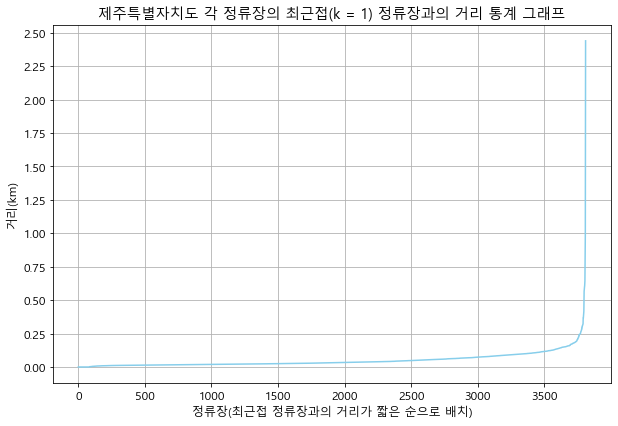

In [5]:
min_dist_list = get_dist_from_most_adjacent_station_per_each_station(df)
jejudo = min_dist_list

fig_title = '제주특별자치도 각 정류장의 최근접(k = 1) 정류장과의 거리 통계 그래프'

plt.rcParams['font.size'] = 12
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.figure(figsize=(10, 6.6))
# 6:4 = 10: 6.6 ... plt.rcParams['figure.figsize']

plt.yticks(np.linspace(0, 2.5, 11))

plt.grid()
plt.rc('font', family='Malgun Gothic')
plt.title(fig_title)
plt.xlabel('정류장(최근접 정류장과의 거리가 짧은 순으로 배치)')
plt.ylabel('거리(km)')
plt.plot(jejudo, color = 'skyblue')
plt.gcf().savefig(result_path + '/' + fig_title)
plt.show()

In [6]:
min_dist_list.mean(), min_dist_list.max(), min_dist_list.min() # 단위: km

(0.051308692913385925, 2.44, 0.0)

In [19]:
jejudo[3750:]

3750     208.93
3751     211.97
3752     213.95
3753     217.77
3754     218.18
3755     218.46
3756     221.51
3757     229.44
3758     229.44
3759     231.56
3760     239.47
3761     239.47
3762     244.00
3763     244.59
3764     245.86
3765     245.87
3766     247.09
3767     247.09
3768     248.13
3769     248.13
3770     248.24
3771     253.38
3772     259.81
3773     263.19
3774     266.67
3775     267.20
3776     269.01
3777     272.43
3778     275.10
3779     281.83
3780     282.18
3781     292.64
3782     292.86
3783     303.28
3784     303.28
3785     306.34
3786     310.96
3787     314.05
3788     314.05
3789     316.05
3790     322.77
3791     365.80
3792     365.80
3793     376.57
3794     380.97
3795     402.80
3796     418.83
3797     531.83
3798     565.07
3799     580.04
3800     596.34
3801     599.28
3802     606.50
3803     638.48
3804     645.57
3805     775.25
3806     842.90
3807     987.86
3808    2077.34
3809    2440.00
dtype: float64

In [8]:
jejudo[3807] # inflection point check

0.98786

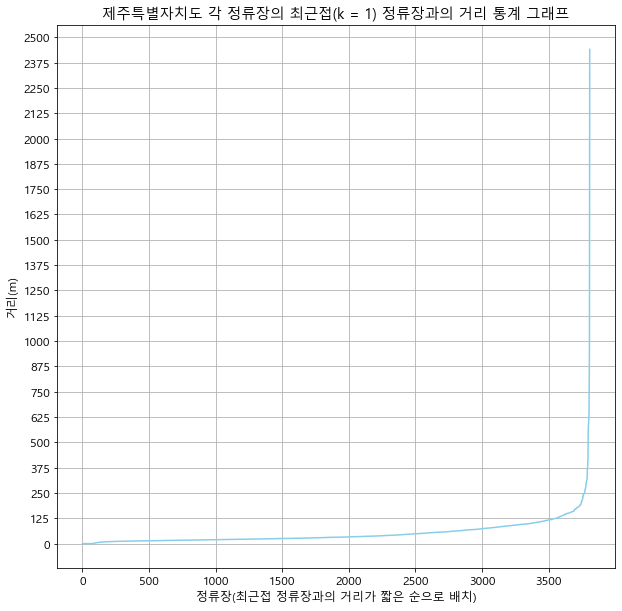

In [9]:
fig_title = '제주특별자치도 각 정류장의 최근접(k = 1) 정류장과의 거리 통계 그래프'

jejudo = jejudo * 1000

plt.rcParams['font.size'] = 12
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.figure(figsize=(10, 10))
plt.yticks(np.linspace(0, 2500, 21))
# 6:4 = 10: 6.6 ... plt.rcParams['figure.figsize']
plt.grid()
plt.rc('font', family='Malgun Gothic')
plt.title(fig_title)
plt.xlabel('정류장(최근접 정류장과의 거리가 짧은 순으로 배치)')
plt.ylabel('거리(m)')
plt.plot(jejudo, color = 'skyblue')
plt.gcf().savefig(result_path + '/' + 'm단위 ' + fig_title)
plt.show()

# 4. 서귀포시 수행 결과

In [10]:
seogwipo_city_station_df = df.query('city == "서귀포시"')

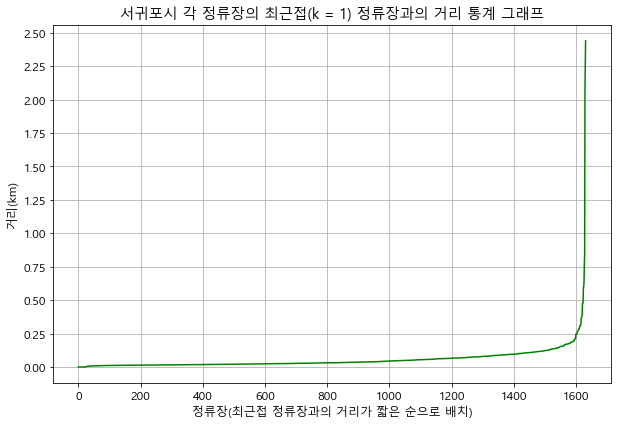

In [11]:
min_dist_list = get_dist_from_most_adjacent_station_per_each_station(seogwipo_city_station_df)
seogwipo = min_dist_list

fig_title = '서귀포시 각 정류장의 최근접(k = 1) 정류장과의 거리 통계 그래프'

plt.rcParams['font.size'] = 12
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.figure(figsize=(10, 6.6))
plt.yticks(np.linspace(0, 2.5, 11))

# 6:4 = 10: 6.6 ... plt.rcParams['figure.figsize']
plt.grid()
plt.rc('font', family='Malgun Gothic')
plt.title(fig_title)
plt.xlabel('정류장(최근접 정류장과의 거리가 짧은 순으로 배치)')
plt.ylabel('거리(km)')
plt.plot(seogwipo, color = 'green')
plt.gcf().savefig(result_path + '/' + fig_title)
plt.show()

In [12]:
min_dist_list.mean(), min_dist_list.max(), min_dist_list.min() # 단위: km

(0.05705143382352934, 2.44, 0.0)

In [22]:
seogwipo[1590:]

1590     190.70
1591     190.70
1592     191.79
1593     191.79
1594     204.26
1595     204.26
1596     204.94
1597     211.97
1598     213.95
1599     218.46
1600     247.09
1601     247.09
1602     248.13
1603     248.13
1604     253.38
1605     266.67
1606     269.01
1607     272.43
1608     275.10
1609     281.83
1610     282.18
1611     292.64
1612     303.28
1613     303.28
1614     310.96
1615     316.05
1616     322.77
1617     365.80
1618     365.80
1619     376.57
1620     405.06
1621     476.18
1622     476.18
1623     482.50
1624     596.34
1625     599.28
1626     638.48
1627     775.25
1628     842.90
1629    2077.34
1630    2288.99
1631    2440.00
dtype: float64

In [13]:
seogwipo.iloc[1600] #inflection point

0.24709

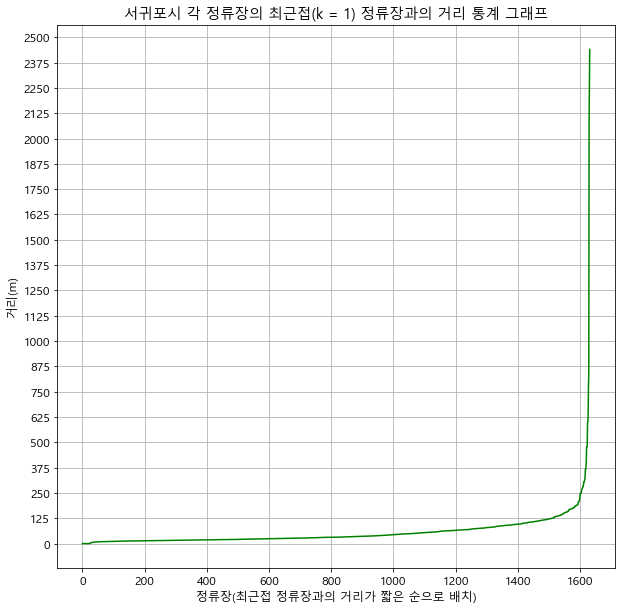

In [14]:
fig_title = '서귀포시 각 정류장의 최근접(k = 1) 정류장과의 거리 통계 그래프'

seogwipo = seogwipo * 1000

plt.rcParams['font.size'] = 12
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.figure(figsize=(10, 10))
plt.yticks(np.linspace(0, 2500, 21))

# 6:4 = 10: 6.6 ... plt.rcParams['figure.figsize']
plt.grid()
plt.rc('font', family='Malgun Gothic')
plt.title(fig_title)
plt.xlabel('정류장(최근접 정류장과의 거리가 짧은 순으로 배치)')
plt.ylabel('거리(m)')
plt.plot(seogwipo, color = 'green')
plt.gcf().savefig(result_path + '/' + 'm단위 ' + fig_title)
plt.show()

# 5. 제주시 수행 결과

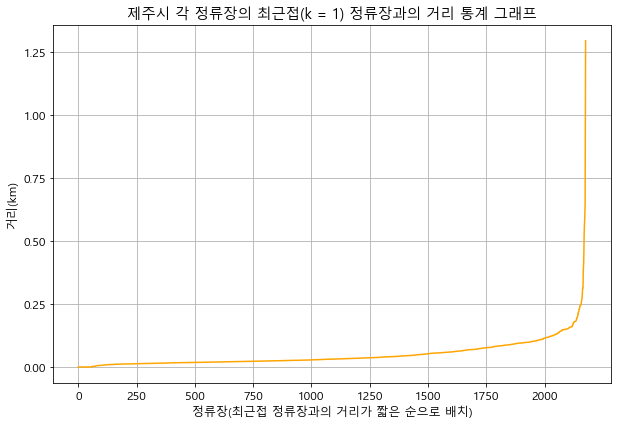

In [15]:
jeju_city_station_df = df.query('city == "제주시"')
min_dist_list = get_dist_from_most_adjacent_station_per_each_station(jeju_city_station_df)
jejusi = min_dist_list[:-1] # 마지막 데이터가 지나치게 이상해서 임의로 미포함시킴...

fig_title = '제주시 각 정류장의 최근접(k = 1) 정류장과의 거리 통계 그래프'

plt.rcParams['font.size'] = 12
plt.rcParams['font.family'] = 'Malgun Gothic'

plt.figure(figsize=(10, 6.6))
plt.yticks(np.linspace(0, 2.5, 11))
plt.xticks(np.linspace(0, 2000, 9))

# 6:4 = 10: 6.6 ... plt.rcParams['figure.figsize']
plt.grid()
plt.rc('font', family='Malgun Gothic')
plt.title(fig_title)
plt.xlabel('정류장(최근접 정류장과의 거리가 짧은 순으로 배치)')
plt.ylabel('거리(km)')
plt.plot(jejusi, color = 'orange')
plt.gcf().savefig(result_path + '/' + fig_title)
plt.show()

In [16]:
jejusi.mean(), jejusi.max(), jejusi.min() # 단위: km

(0.04971602664216805, 1.29458, 0.0)

In [26]:
jejusi[2100:]

2100     151.58
2101     152.12
2102     152.12
2103     154.13
2104     154.58
2105     155.84
2106     157.16
2107     158.00
2108     158.00
2109     158.11
2110     158.11
2111     158.13
2112     158.69
2113     158.92
2114     158.92
2115     159.06
2116     159.28
2117     159.87
2118     161.14
2119     161.14
2120     165.23
2121     168.99
2122     168.99
2123     172.36
2124     173.89
2125     177.29
2126     178.85
2127     179.07
2128     179.07
2129     180.36
         ...   
2147     221.51
2148     229.44
2149     229.44
2150     231.56
2151     239.47
2152     239.47
2153     244.00
2154     244.59
2155     245.86
2156     245.87
2157     248.24
2158     259.81
2159     263.19
2160     267.20
2161     275.01
2162     292.86
2163     306.34
2164     314.05
2165     314.05
2166     380.97
2167     402.80
2168     418.83
2169     479.02
2170     531.83
2171     565.07
2172     580.04
2173     606.50
2174     645.57
2175     987.86
2176    1294.58
Length: 77, dtype: float

In [17]:
jejusi[2174] # inflection point check

0.64557

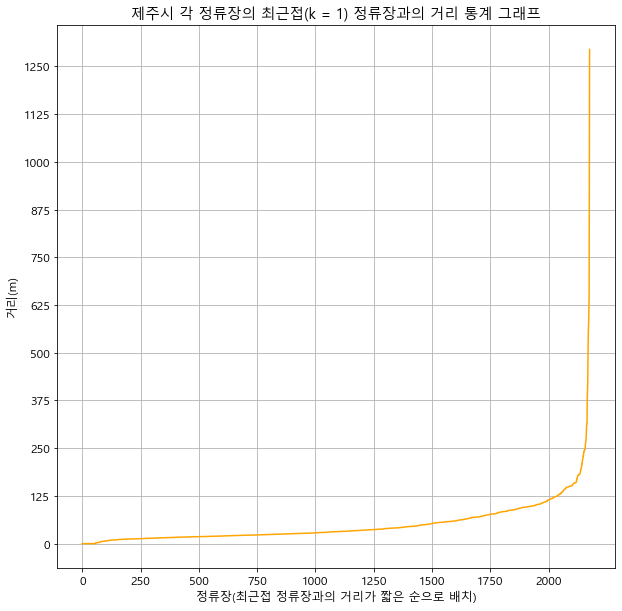

In [18]:
fig_title = '제주시 각 정류장의 최근접(k = 1) 정류장과의 거리 통계 그래프'

jejusi = jejusi * 1000

plt.rcParams['font.size'] = 12
plt.rcParams['font.family'] = 'Malgun Gothic'

plt.figure(figsize=(10, 10))
plt.yticks(np.linspace(0, 2500, 21))
plt.xticks(np.linspace(0, 2000, 9))

# 6:4 = 10: 6.6 ... plt.rcParams['figure.figsize']
plt.grid()
plt.rc('font', family='Malgun Gothic')
plt.title(fig_title)
plt.xlabel('정류장(최근접 정류장과의 거리가 짧은 순으로 배치)')
plt.ylabel('거리(m)')
plt.plot(jejusi, color = 'orange')
plt.gcf().savefig(result_path + '/' + 'm단위 ' + fig_title)
plt.show()